In [1]:
from utilidades import *
import warnings
warnings.filterwarnings('ignore')

# DBSCAN

O algoritmo de clusterização DBSCAN (Density-Based Spatial Clustering of Applications with Noise) é um método de aprendizado de máquina não supervisionado que agrupa os dados com base na densidade dos pontos. Ao contrário de outros algoritmos de clusterização, como o K-means, o DBSCAN não requer a especificação prévia do número de clusters K. Ele é especialmente útil para identificar clusters em conjuntos de dados com formas irregulares e que contêm ruídos.

Passo a passo de como o algoritmo de clusterização DBSCAN funciona:

**1. Determinação de pontos centrais e pontos de borda**: O algoritmo começa escolhendo um ponto qualquer do conjunto de dados que ainda não foi visitado e verifica os seus pontos vizinhos (dentro de uma determinada distância chamada de raio de vizinhança). Se na sua vizinhança contiver um número mínimo de pontos (chamado de "minPts"), o ponto inicial é considerado um "ponto central" caso contrário ele é considerado um “ponto de borda”.

**2. Expansão do cluster**: A partir de um ponto central o algoritmo expande o cluster incluindo todos os pontos alcançáveis que pertencem à sua vizinhança. Os pontos centrais que foram inseridos no agrupamento também vão expandir o cluster incluindo seus pontos vizinhos, já os pontos de borda que foram inseridos não vão inserir seus vizinhos.

**3. Expansão para outros pontos não visitados**: O algoritmo continua repetir o passo 2 para outros pontos não visitados até que todos os pontos tenham sido visitados.

**4. Identificação de ruídos**: Caso haja pontos que não foram inseridos em nenhum clusters eles serão identificados como outliers (Na implementação do sklearn receberam a label -1).

O DBSCAN é capaz de identificar clusters com formas irregulares e é robusto em relação a ruídos, pois os pontos isolados são considerados ruídos e não são atribuídos a nenhum cluster. Ele também não requer a definição prévia do número de clusters, o que é uma grande vantagem em relação a outros algoritmos. No entanto, a escolha adequada dos parâmetros, como o raio de vizinhança e o número mínimo de pontos (minPts), é importante para obter resultados ótimos.


# Data

In [2]:
X_iris, y_iris, iris_target_names = get_iris_data()
X_wine, y_wine, wine_target_names = get_wine_data()
X_syn_ctrl, y_syn_ctrl, syn_ctrl_target_names = get_synthetic_control_data()

# Normalizando os dados
from scipy.stats import zscore
X_syn_ctrl = zscore(X_syn_ctrl)
X_iris = zscore(X_iris)
X_wine = zscore(X_wine)

<h1>Redução de dimensionalidade</h1>

In [3]:
from sklearn.manifold import TSNE

X_syn_ctrl_2d = TSNE().fit_transform(X_syn_ctrl)
X_wine_2d = TSNE().fit_transform(X_wine)
X_iris_2d = TSNE().fit_transform(X_iris)

# Clusterização

In [4]:
from sklearn.cluster import DBSCAN

db_labels_syn_ctrl = DBSCAN(eps = 5.1, min_samples=50).fit_predict(X_syn_ctrl)
db_labels_iris = DBSCAN().fit_predict(X_iris)
db_labels_wine = DBSCAN(eps=2.4, min_samples=10).fit_predict(X_wine)

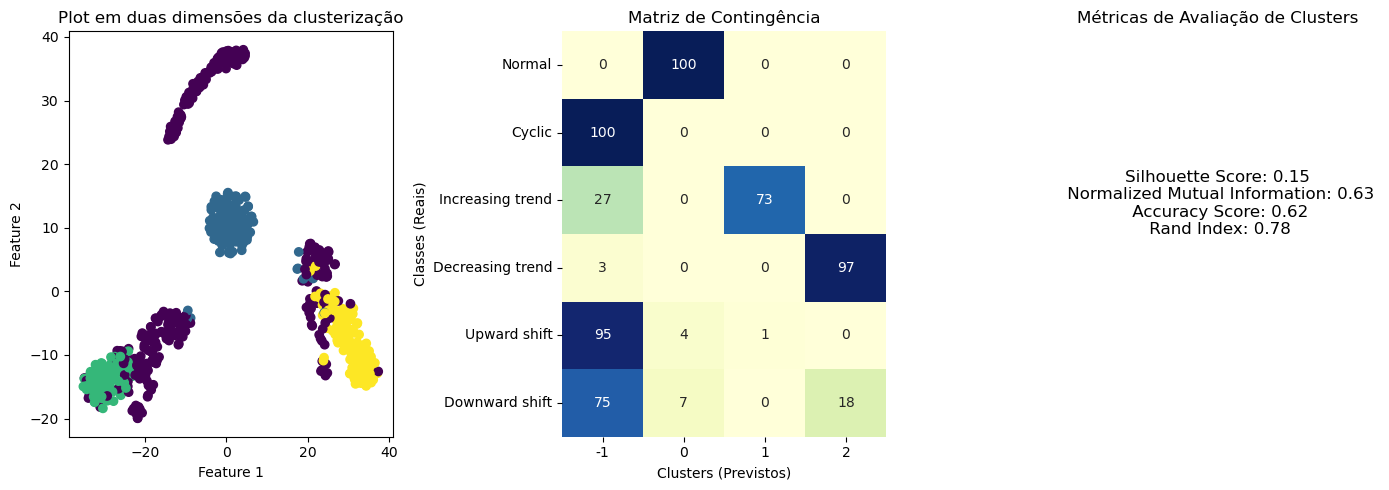

In [5]:
# Synthetic Control

plot_cluster_evaluation(X_syn_ctrl_2d, y_syn_ctrl, db_labels_syn_ctrl, syn_ctrl_target_names)

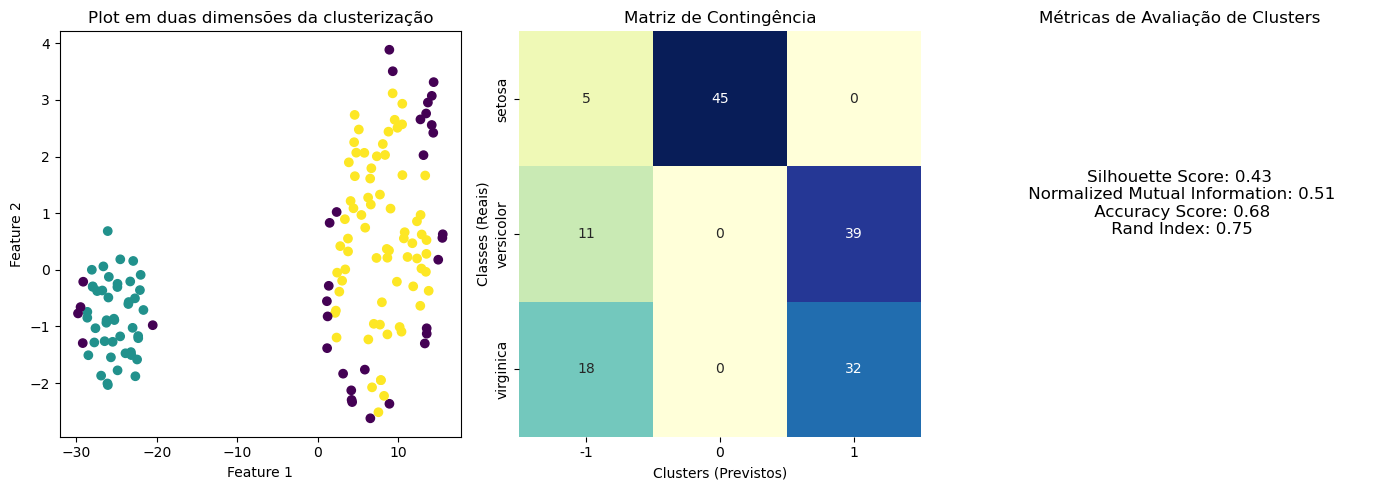

In [6]:
# Iris

plot_cluster_evaluation(X_iris_2d, y_iris, db_labels_iris, iris_target_names)

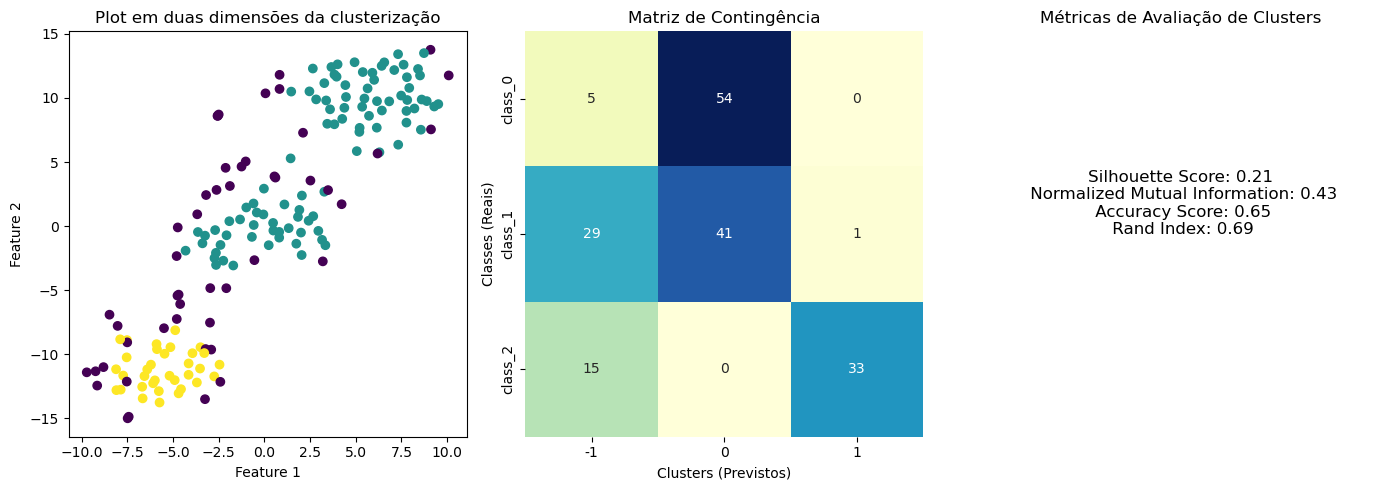

In [7]:
# Wine

plot_cluster_evaluation(X_wine_2d, y_wine, db_labels_wine, wine_target_names)